
## CS6220 - HW4 - Maha Alkhairy
### Clustering and evaluation 


In [1]:
"""
Implementation of different types of clustering 
"""
import math
import random
import sklearn 
import numpy as np 
import scipy.io 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from pandas import DataFrame
from sklearn.metrics import normalized_mutual_info_score, silhouette_score, calinski_harabaz_score

### Written part: 
#### for more detail look at the scanned pdf 

### Question 1: 
a. The clusters given their points: 
* Cluster 1: {[0, 1], [1, 2], [2, 3], [3, 4]} 
* Cluster 2: {[5, 2], [6, 1], [7, 2], [6, 3]}

b. Points which are density connected: 
* [0, 1], [1, 2], [2, 3] and [3, 4] are density connected
* [5, 2], [6, 1], [7, 2] and [6, 3] are density connected 

c. Points considered as noise are: [0, 6], [0, 7] and [10, 3]



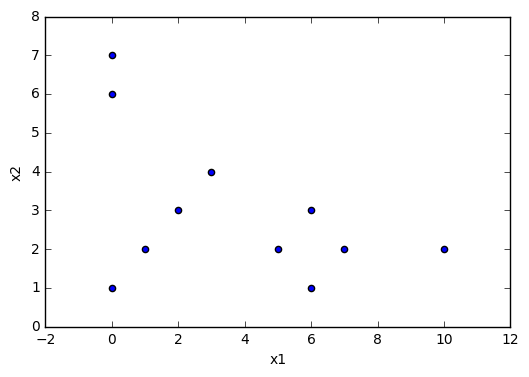

In [2]:
# ******  plotting the written part to make sense of data ****
data_DBSCAN = np.array([[0, 1], 
                        [5, 2], 
                        [2, 3], 
                        [6, 1], 
                        [10, 2],
                        [0, 6], 
                        [3, 4], 
                        [6, 3], 
                        [0, 7], 
                        [7, 2], 
                        [1, 2]])


# print(data_DBSCAN)


df_2 = DataFrame(data_DBSCAN, columns = ['x1', 'x2'])
df_2.plot(kind='scatter', x = 'x1', y = 'x2')
plt.show()

### Question 2: 
C<sub>1</sub> = {(5, 6), (8, 7), (7, 3)} <br/>
C<sub>2</sub> = {(6, 5), (4, 5), (9, 2), (3, 5), (8, 4)}

a. mean vectors: 
 * m1 = [6.66666, 5.33333] (mean of first cluster (1 × 2))
 * m2 = [6, 4.2]            (mean of second cluster (1 × 2)) 
 
b. total mean vector: 
* m = [6.25, 4.625]       (mean of all points (1 × 2))  


c. Scatter matrices of the clusters 
* S<sub>1</sub> = [[4.6666, 0.333333], [0.33333, 8.66666]]   (scatter matrix of cluster 1 (2 × 2)) 
* S<sub>2</sub> = [[26, -11], [-11, 6.8]]   (scatter matrix of cluster 2 (2 × 2))  
 
d. Within cluster scatter matrix (2 × 2)
* S<sub>w</sub> = S<sub>1</sub> + S<sub>2</sub> = [[30.6666, -10.6666], [-10.6666, 15.46666]]


e. Between cluster scatter matrix (2 × 2)
* S<sub>b</sub> = (m1 - m).T × (m1 - m) = [[0.83333, 1.4166666], [1.4166666, 2.40833333]]

f. evaluation: based on the scattering criteria, this clustering is not good. 
* tr(S<sub>w</sub>)  = 30.6666 + 15.46666  = 46.1333 (want low) (add the diagonal elements in S<sub>W</sub>)
* tr(S<sub>b</sub>)  = 0.83333 + 2.40833333 = 3.2416666 (want high) (add the diagonal elements in S<sub>B</sub>)
* (tr(S<sub>b</sub>)  / tr(S<sub>w</sub>)) = 0.070267 (want high) 



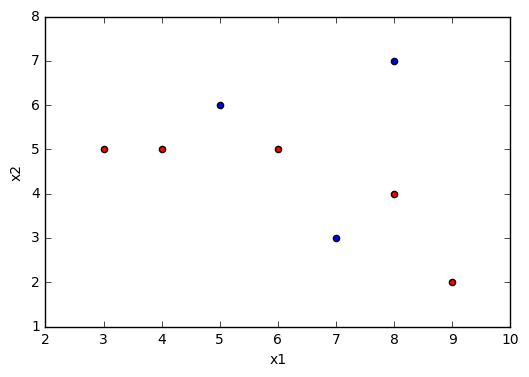

In [3]:
# ******  plotting the written part to make sense of data ****
cluster1 = [[5, 6], [8, 7], [7, 3]]
cluster2 = [[6, 5], [4, 5], [9, 2], [3, 5], [8, 4]]

# all_data = list(cluster1)
# all_data.extend(cluster2)

# cluster1_matrix = np.array(cluster1)
# cluster2_matrix = np.array(cluster2)

# all_data_matrix = np.array(all_data)


df = DataFrame(np.array(cluster1), columns = ['x1', 'x2'])
c1 = df.plot(kind='scatter', x = 'x1', y = 'x2')
# plt.show()

df1 = DataFrame(np.array(cluster2), columns = ['x1', 'x2'])
df1.plot(kind='scatter', x = 'x1', y = 'x2', c = ['red'], ax = c1)
plt.show()
    
# m1 = np.mean(cluster1_matrix, axis=0)
# m2 = np.mean(cluster2_matrix, axis=0)
# m = np.mean(all_data_matrix, axis=0)

# C1_m1 = cluster1_matrix - m1
# C2_m2 = cluster2_matrix - m2

# S1 = np.dot(C1_m1.T, C1_m1)
# S2 = np.dot(C2_m2.T, C2_m2)
# S_W = S1 + S2 

# m_1 = np.array([(m1 - m)])
# m_2 = np.array([(m2 - m)])
# S_B = np.dot(m_1.T, m_1) * 3 + np.dot(m_2.T, m_2) * 5
# np.shape(S_B)
# print(S_B.trace()/ S_W.trace())

## Question 3: 
please look at scanned paper

## Questions 4, 5 and 6: 

### Programming part: 

In [4]:
data1 = np.loadtxt("datasets/dataset1.txt",
                    dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)},
                    delimiter="\t")
data2 = np.loadtxt("datasets/dataset2.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")
data3 = np.loadtxt("datasets/dataset3.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")

In [5]:
def create_io_matrix(d): 
    """
    formats the input data in a matrix format (n × d) where d is the number of dimentions and n is the number of data points 
    formats the label data in a matrix format (n × 1) where n is the number of data points 
    """
    matrix_input = [[x1, x2] for x1, x2, l in d]
    matrix_labels = [l for x1, x2, l in d]
    
    return (np.array(matrix_input), np.array(matrix_labels))

In [6]:
### number of clusters = 3
data1_matrix, data1_labels = create_io_matrix(data1)
# print(len(data1))
print(np.shape(data1_matrix))
# print(np.shape(data1_labels))
# print(data1_labels)
### number of cluster = 3
data2_matrix, data2_labels = create_io_matrix(data2)
# print(len(data2))
# print(np.shape(data2_matrix))
# print(np.shape(data2_labels))
# print(data2_labels)
### number of clusters = 2
data3_matrix, data3_labels = create_io_matrix(data3)
# print(len(data3))
# print(np.shape(data3_matrix))
# print(np.shape(data3_labels))

(150, 2)


=================== data 1 ======================


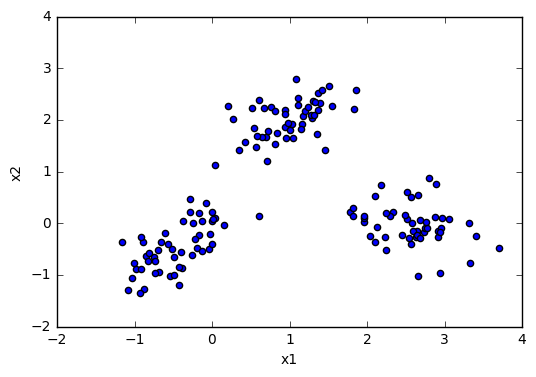

===================== data 2 ===================


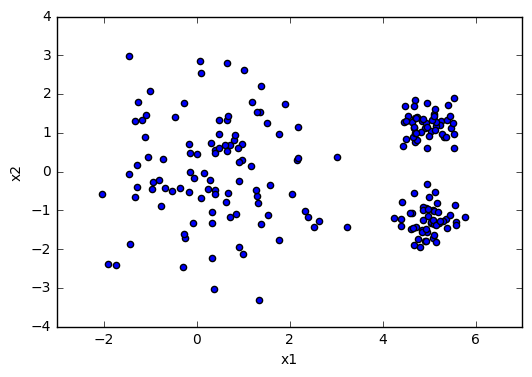

================= data 3 ==================


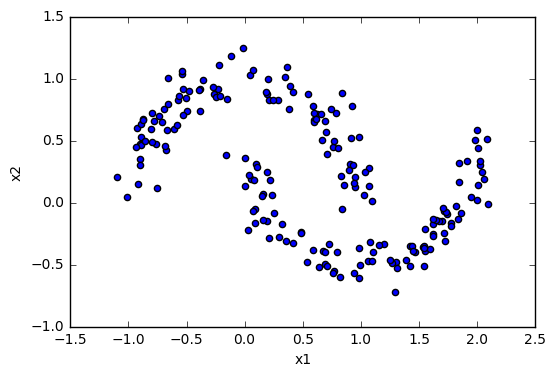

In [7]:
############# initial data visualization 

df_1 = DataFrame(data1_matrix, columns = ['x1', 'x2'])
df_1.plot(kind='scatter', x = 'x1', y = 'x2')

print("=================== data 1 ======================")
plt.show()

df_2 = DataFrame(data2_matrix, columns = ['x1', 'x2'])
df_2.plot(kind='scatter', x = 'x1', y = 'x2')

print("===================== data 2 ===================")
plt.show()

df_3 = DataFrame(data3_matrix, columns = ['x1', 'x2'])
df_3.plot(kind='scatter', x = 'x1', y = 'x2')

print("================= data 3 ==================")
plt.show()

based on the plotting of the points above, I would predict that k-means would be the best algorithm to get the clusters is k-means with 3 clusters 



## DBSCAN Algorithm (Q4)

In [8]:
### DBSCAN Algorithm: 

def DBSCAN(eps, min_points, input_matrix): 
    """
    """
    visited = []
    noise = []
    clusters = {}
    c_index = 0
    
    print("running DBSCAN with eps = {}, and min_pts = {}".format(eps, min_points))
  
    for p in input_matrix:
        if list(p) in visited: 
            continue
            
        if list(p) not in visited:
            visited.append(list(p))
            neighbors = region_query(p, eps, input_matrix) 
            if len(neighbors) < min_points:
                noise.append(list(p))
            else: 
                c_index += 1
                visited, clusters, noise = expand_cluster(p, neighbors, eps, min_points,
                                                          visited, clusters, c_index,
                                                          input_matrix, noise)    
    return (visited, clusters, noise)
            

def expand_cluster(p, neighbors, eps, min_points, visited, clusters, c_index, input_matrix, noise): 
    """
    """
    clusters[c_index] = [list(p)]
    for q in neighbors: 
        if list(q) not in visited: 
            visited.append(list(q))
            new_neighbors = region_query(q, eps, input_matrix)
            if len(new_neighbors) >= min_points: 
                neighbors.extend(new_neighbors)

        if not member_cluster(list(q), clusters):
            clusters[c_index].append(list(q))
            if list(q) in noise: 
                noise.remove(list(q))
            
    return visited, clusters, noise
            
def member_cluster(q, clusters):
    for _, c in clusters.items(): 
        if list(q) in c:
            return True
    return False

def region_query(p, eps, input_matrix): 
    """
    :return: all points within P's eps-neighborhood (including P)
    """
    eps_neighbors = [list(x) for x in input_matrix if (distance.euclidean(x, p) <= eps)]
    return eps_neighbors
    


In [9]:
### running DBSCAN on the data #1 

print("running DBSCAN on the first dataset: ")
visited111, clusters111, noise111 = DBSCAN(0.2, 2, data1_matrix)
visited112, clusters112, noise112 = DBSCAN(0.2, 3, data1_matrix)
visited113, clusters113, noise113 = DBSCAN(0.2, 4, data1_matrix)

visited121, clusters121, noise121 = DBSCAN(0.3, 2, data1_matrix)
visited122, clusters122, noise122 = DBSCAN(0.3, 3, data1_matrix)
visited123, clusters123, noise123 = DBSCAN(0.3, 4, data1_matrix)

visited131, clusters131, noise131 = DBSCAN(0.4, 2, data1_matrix)
visited132, clusters132, noise132 = DBSCAN(0.4, 3, data1_matrix)
visited133, clusters133, noise133 = DBSCAN(0.4, 4, data1_matrix)


print("done running DBSCAN on the first dataset")

running DBSCAN on the first dataset: 
running DBSCAN with eps = 0.2, and min_pts = 2
running DBSCAN with eps = 0.2, and min_pts = 3
running DBSCAN with eps = 0.2, and min_pts = 4
running DBSCAN with eps = 0.3, and min_pts = 2
running DBSCAN with eps = 0.3, and min_pts = 3
running DBSCAN with eps = 0.3, and min_pts = 4
running DBSCAN with eps = 0.4, and min_pts = 2
running DBSCAN with eps = 0.4, and min_pts = 3
running DBSCAN with eps = 0.4, and min_pts = 4
done running DBSCAN on the first dataset


In [10]:
### running DBSCAN on the data #2

print("running DBSCAN on the second dataset: ")
visited211, clusters211, noise211 = DBSCAN(0.8, 6, data2_matrix)
visited212, clusters212, noise212 = DBSCAN(0.8, 7, data2_matrix)
visited213, clusters213, noise213 = DBSCAN(0.8, 8, data2_matrix)

visited221, clusters221, noise221 = DBSCAN(0.85, 6, data2_matrix)
visited222, clusters222, noise222 = DBSCAN(0.85, 7, data2_matrix)
visited223, clusters223, noise223 = DBSCAN(0.85, 8, data2_matrix)

visited231, clusters231, noise231 = DBSCAN(0.9, 6, data2_matrix)
visited232, clusters232, noise232 = DBSCAN(0.9, 7, data2_matrix)
visited233, clusters233, noise233 = DBSCAN(0.9, 8, data2_matrix)


print("done running DBSCAN on the second dataset")

running DBSCAN on the second dataset: 
running DBSCAN with eps = 0.8, and min_pts = 6
running DBSCAN with eps = 0.8, and min_pts = 7
running DBSCAN with eps = 0.8, and min_pts = 8
running DBSCAN with eps = 0.85, and min_pts = 6
running DBSCAN with eps = 0.85, and min_pts = 7
running DBSCAN with eps = 0.85, and min_pts = 8
running DBSCAN with eps = 0.9, and min_pts = 6
running DBSCAN with eps = 0.9, and min_pts = 7
running DBSCAN with eps = 0.9, and min_pts = 8
done running DBSCAN on the second dataset


In [11]:
### running DBSCAN on the data #3

print("running DBSCAN on the third dataset: ")

visited311, clusters311, noise311 = DBSCAN(0.2, 5, data3_matrix)
visited312, clusters312, noise312 = DBSCAN(0.2, 6, data3_matrix)
visited313, clusters313, noise313 = DBSCAN(0.2, 7, data3_matrix)

visited321, clusters321, noise321 = DBSCAN(0.3, 5, data3_matrix)
visited322, clusters322, noise322 = DBSCAN(0.3, 6, data3_matrix)
visited323, clusters323, noise323 = DBSCAN(0.3, 7, data3_matrix)

visited331, clusters331, noise331 = DBSCAN(0.4, 5, data3_matrix)
visited332, clusters332, noise332 = DBSCAN(0.4, 6, data3_matrix)
visited333, clusters333, noise333 = DBSCAN(0.4, 7, data3_matrix)

print("done running DBSCAN on the third dataset")

running DBSCAN on the third dataset: 
running DBSCAN with eps = 0.2, and min_pts = 5
running DBSCAN with eps = 0.2, and min_pts = 6
running DBSCAN with eps = 0.2, and min_pts = 7
running DBSCAN with eps = 0.3, and min_pts = 5
running DBSCAN with eps = 0.3, and min_pts = 6
running DBSCAN with eps = 0.3, and min_pts = 7
running DBSCAN with eps = 0.4, and min_pts = 5
running DBSCAN with eps = 0.4, and min_pts = 6
running DBSCAN with eps = 0.4, and min_pts = 7
done running DBSCAN on the third dataset


### Evaluating DBSCAN with different eps and min_pts


In [12]:
def get_clustering_labels_dbscan(clusters, noise, data_matrix): 
    """
    0 is noise 
    """
    all_data = [list(p) for p in data_matrix]
    labels = []
    for c_i, c in clusters.items(): 
        for p in c: 
            i = all_data.index(p)
            labels.insert(i+1, c_i)
    for p in noise: 
        i = all_data.index(p)
        labels.insert(i+1, 0)
    return labels

def get_clustering_scores(data_matrix, true_labels, clusterings_and_noise): 
    """
    """
    clustering, noise, clustering_name = clusterings_and_noise
    predicted_labels = get_clustering_labels_dbscan(clustering, noise, data_matrix)
    print(len(predicted_labels))
    print(np.shape(data_matrix))
    print(clustering_name)
    print(len(clustering), len(noise))
    print("\t NMI: ", normalized_mutual_info_score(true_labels, predicted_labels))
    print("\t SC: ", silhouette_score(data_matrix, predicted_labels)) 
    print("\t CH: ", calinski_harabaz_score(data_matrix, predicted_labels))
    

name_temp = "clustering data {} using dbscan with eps = {} and  min_pts = {}"

clusterings_and_noise = {1: [
                            (clusters111, noise111, name_temp.format(1, 0.2, 2)), 
                            (clusters112, noise112, name_temp.format(1, 0.2, 3)),
                            (clusters113, noise113, name_temp.format(1, 0.2, 4)), 

                            (clusters121, noise121, name_temp.format(1, 0.3, 2)), 
                            (clusters122, noise122, name_temp.format(1, 0.3, 3)),
                            (clusters123, noise123, name_temp.format(1, 0.3, 4)), 

                            (clusters131, noise131, name_temp.format(1, 0.4, 2)), 
                            (clusters132, noise132, name_temp.format(1, 0.4, 3)),
                            (clusters133, noise133, name_temp.format(1, 0.4, 4))
                            ], 
                        
                        2: [
                            (clusters211, noise211, name_temp.format(2, 0.8, 6)), 
                            (clusters212, noise212, name_temp.format(2, 0.8, 7)), 
                            (clusters213, noise213, name_temp.format(2, 0.8, 8)),

                            (clusters221, noise221, name_temp.format(2, 0.85, 6)), 
                            (clusters222, noise222, name_temp.format(2, 0.85, 7)), 
                            (clusters223, noise223, name_temp.format(2, 0.85, 8)), 

                            (clusters231, noise231, name_temp.format(2, 0.9, 6)),
                            (clusters232, noise232, name_temp.format(2, 0.9, 7)), 
                            (clusters233, noise233, name_temp.format(2, 0.9, 8))
                           ], 
                        
                        3: [
                            (clusters311, noise311, name_temp.format(3, 0.2, 5)), 
                            (clusters312, noise312, name_temp.format(3, 0.2, 6)), 
                            (clusters313, noise313, name_temp.format(3, 0.2, 7)), 

                            (clusters321, noise321, name_temp.format(3,0.3, 5)), 
                            (clusters322, noise322, name_temp.format(3,0.3, 6)), 
                            (clusters323, noise323, name_temp.format(3,0.3, 7)), 

                            (clusters331, noise331 , name_temp.format(3, 0.4, 5)), 
                            (clusters332, noise332 , name_temp.format(3, 0.4, 6)), 
                            (clusters333, noise333 , name_temp.format(3, 0.4, 7))
    ]} 


    
# get_clustering_scores(data3_matrix, data3_labels, clusterings_and_noise[3][4])

In [13]:
for i, cs_ns in clusterings_and_noise.items(): 
    for cs_n in cs_ns: 
        print(" ---------------------------------------------- ")       
        try: 
            if i == 1: 
                get_clustering_scores(data1_matrix, data1_labels, cs_n)
            if i == 2: 
                get_clustering_scores(data2_matrix, data2_labels, cs_n)
            if i == 3:
                get_clustering_scores(data3_matrix, data3_labels, cs_n)
        except ValueError as error: 
            print("only found one cluster ", cs_n[2])

 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.2 and  min_pts = 2
10 22
	 NMI:  0.646195546176
	 SC:  -0.0516638088132
	 CH:  47.7051454088
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.2 and  min_pts = 3
8 26
	 NMI:  0.639288539112
	 SC:  0.00493412605307
	 CH:  51.068307666
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.2 and  min_pts = 4
7 34
	 NMI:  0.606522607116
	 SC:  -0.0266342173032
	 CH:  43.5332413573
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.3 and  min_pts = 2
8 8
	 NMI:  0.808041793035
	 SC:  0.0910046812406
	 CH:  117.829730523
 ---------------------------------------------- 
150
(150, 2)
clustering data 1 using dbscan with eps = 0.3 and  min_pts = 3
4 16
	 NMI:  0.812684971619
	 SC:  0.342922761635
	 CH:  172.759943135
 -------------

In [14]:
def plotPointsBasedOnLabels(clusters, noise, colors, original_labels, data, shapes): 
    """
    black is noise
    """
    K = len(clusters)
    print("number of clusters: ", K)
    all_points = [list(p) for p in data]
    number_of_original_label = len(list(set(original_labels)))
    for k in range(1, K+1): 
        for p in clusters[k]: 
            i = all_points.index(list(p))
            plt.scatter(p[0], p[1], color=colors[k-1], marker=shapes[original_labels[i] - 1])
    if noise:
        for p in noise:
            i = all_points.index(list(p))
            plt.scatter(p[0], p[1], color="black", marker=shapes[original_labels[i] - 1])
    plt.show()

 clustering data 1 using dbscan with eps = 0.4 and  min_pts = 3 
 	 NMI:  0.926171848823 	 SC:  0.585198949456 	 CH:  326.978541133
number of clusters:  3


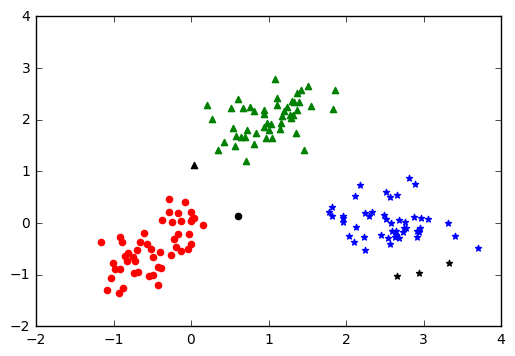

clustering data 2 using dbscan with eps = 0.9 and  min_pts = 6 
 	 NMI:  0.908790490113 	 SC:  0.415764191075 	 CH:  206.827386859
number of clusters:  3


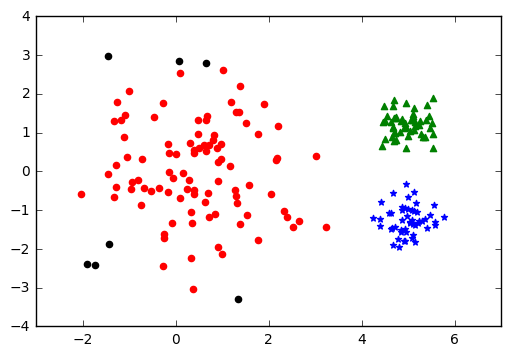

clustering data 3 using dbscan with eps = 0.3 and  min_pts = 7 
 	 NMI:  1.0 	 SC:  0.362298541786 	 CH:  162.813208069
number of clusters:  2


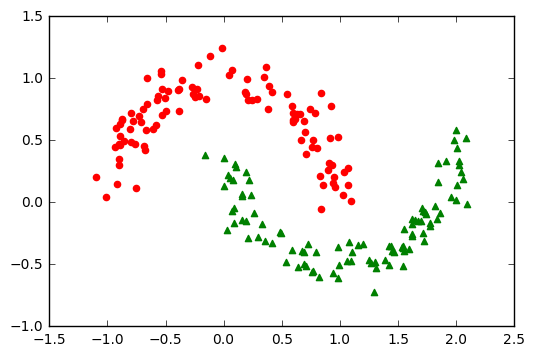

In [15]:
### only plotting the ones with the highest clustering evaluation score: 

print(" clustering data 1 using dbscan with eps = 0.4 and  min_pts = 3", 
      "\n \t NMI:  0.926171848823 \t SC:  0.585198949456 \t CH:  326.978541133")
plotPointsBasedOnLabels(clusters132, noise132, ["r", "g", "b"], data1_labels, data1_matrix, ['o', '^', '*'])

print("clustering data 2 using dbscan with eps = 0.9 and  min_pts = 6", 
      "\n \t NMI:  0.908790490113 \t SC:  0.415764191075 \t CH:  206.827386859") 
plotPointsBasedOnLabels(clusters231, noise231, ["r", "g", "b"], data2_labels, data2_matrix, ['o', '^', '*'])


print("clustering data 3 using dbscan with eps = 0.3 and  min_pts = 7", 
      "\n \t NMI:  1.0 \t SC:  0.362298541786 \t CH:  162.813208069")

plotPointsBasedOnLabels(clusters323, noise323, ["r", "g", "b"], data3_labels, data3_matrix, ['o', '^', '*'])

### K-means implementation: 


In [16]:
#### K-means algorithm 
## * should preform multiple random initializations and keep the best 
## ---- not crash when initialization results in empty clusters


def k_means(K, input_matrix, initial_means = False, num_restarts = 1000):
    """
    """
    clusterings = []
    sses = []
    for i in range(num_restarts): 
        try: 
            if i == 0: 
                cluster_assignments, cluster_means, sse = K_means_helper(K, input_matrix, initial_means = initial_means)
                clusterings.append((cluster_assignments, cluster_means))
                sses.append(sse)  
            else: 
                cluster_assignments, cluster_means, sse = K_means_helper(K, input_matrix, initial_means = False)
                clusterings.append((cluster_assignments, cluster_means))
                sses.append(sse)  
        except ValueError: 
            continue
            
    return clusterings[sses.index(min(sses))][0],clusterings[sses.index(min(sses))][1] , min(sses)

def K_means_helper(K, input_matrix, initial_means = False): 
    """
    K: number of clusters 
    ...
    """
    N, d = np.shape(input_matrix)
    if isinstance(initial_means, bool): 
        randomInts = [random.randint(1, N-1)  for i in range(K)]
        cluster_means = [input_matrix[i] for i in randomInts]
    else: 
        cluster_means = initial_means

    cluster_assignments = get_cluster_assignments(K, cluster_means, input_matrix)
    sse = compute_sse(input_matrix, cluster_assignments, cluster_means, K)

    converged = False
    i = 0 
    while not converged:
        prev_cluster_assignments = cluster_assignments
        prev_means = cluster_means
        prev_sse = sse


        cluster_means = get_cluster_means(K, cluster_assignments, input_matrix)
        cluster_assignments = get_cluster_assignments(K, cluster_means, input_matrix)
        sse = compute_sse(input_matrix, cluster_assignments, cluster_means, K)

        converged = converged_check(prev_cluster_assignments, cluster_assignments, cluster_means, prev_means, prev_sse, sse, i)
        i = i + 1

    return (cluster_assignments, cluster_means, sse)

def converged_check(cluster_assignments_prev, cluster_assignments, cluster_means, cluster_means_prev, prev_sse, sse, i): 
    """
    """
    if i == 99: 
        print("i = 99")
    return  np.array_equal(cluster_assignments_prev, cluster_assignments) or\
            np.array_equal(cluster_means, cluster_means_prev) or\
            (prev_sse == sse) or\
            (i == 100)
            
            
def get_cluster_assignments(K, cluster_means, input_matrix): 
    """
    """
    
    X = np.asarray(input_matrix)
    N, d = np.shape(X)
    cluster_assignments = np.zeros((N, K))
    ### the rows are one hot vectors which indicate whether the data point is in the cluster
    
#     print("cluster means", cluster_means)
    
    for i in range(N): 
        x_i = X[i]
        distances = list(map(lambda m: distance.euclidean(x_i, m), cluster_means))
        k = distances.index(min(distances))
        cluster_assignments[i, k] = 1
    return cluster_assignments
        
def get_cluster_means(K, cluster_assignments, input_matrix):
    """
    """
 
    X = np.asarray(input_matrix)
    z = np.asarray(cluster_assignments)
    
    
    ## K × 1
    cc = np.sum(cluster_assignments, axis=0)

    ## N × d --> N × 1 × d
    ## N × K --> N × K × 1
    ### N × K × d
    
    mult_data_prob = X[:, None, :] * z[:, :, None]
    means = np.sum(mult_data_prob, axis = 0)
        
    return means / cc[:, None]


def compute_sse(input_matrix, clustering_assignments, cluster_means, K): 
    """
    """

    X = np.asarray(input_matrix)
    z = np.asarray(clustering_assignments)
    
    ## K × d 
    mu = np.asarray(cluster_means)
    
    ## N 
    
    ## N × K × d 
    X0 = X[:, None, :] * z[:, :, None]
    X_m = X0[:, None, :] - mu[None, :, :]
    
    return ((X_m) ** 2).sum()
    

# def getClusteredData(input_matrix, cluster_assignments, k):
#     """
#     """
#     X = np.asarray(input_matrix)
#     z = np.asarray(cluster_assignments)
#     Clusters = (X[:, None, :] * z[:, :, None])

#     return Clusters[:, k, :]
    
    
#     wanted = cluster_assignments[:, k]
#     wanted_X = []
   
#     for i in range(len(wanted)):
#         if cluster_assignments[i][k] == 1: 
#             wanted_X.append(input_matrix[i])
            
#     return wanted_X


In [42]:
def plot_kmean_labels(input_matrix, cluster_assignments, centroids, original_labels, K, colors,  shapes):    
    """
    black is noise
    """
    all_points = [list(p) for p in input_matrix]
    number_of_original_label = len(list(set(original_labels)))
    for k in range(K):
        clustered_k = getClusteredData(input_matrix, cluster_assignments, k)
        print("k: ", k, "c_k: ", len(clustered_k))
        for p in list(clustered_k): 
            i = all_points.index(list(p))
            plt.scatter(p[0], p[1], color=colors[k-1], marker=shapes[original_labels[i] - 1])
            
    for c_m in centroids: 
        print(c_m)
        plt.scatter(c_m[0], c_m[1], color='black', s = 25, marker = 'x')
   
    plt.show()


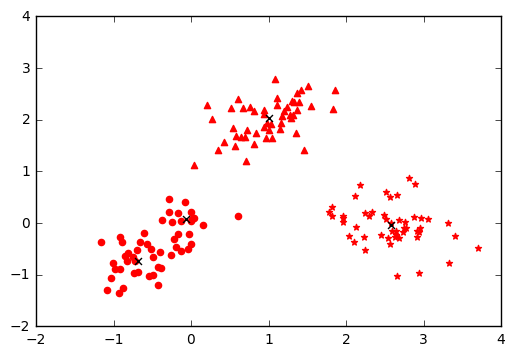

the clustering results of data 1 with K = 5


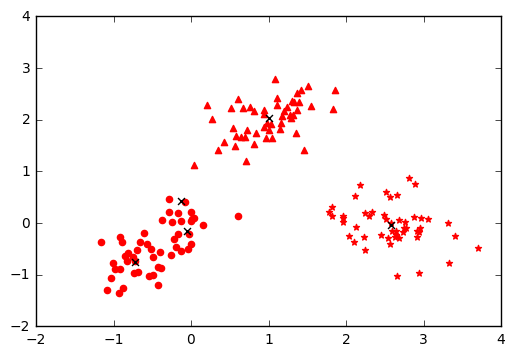

the clustering results of data 2 with K = 1


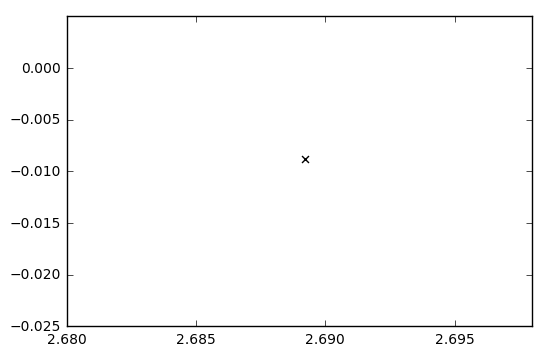

the clustering results of data 2 with K = 2


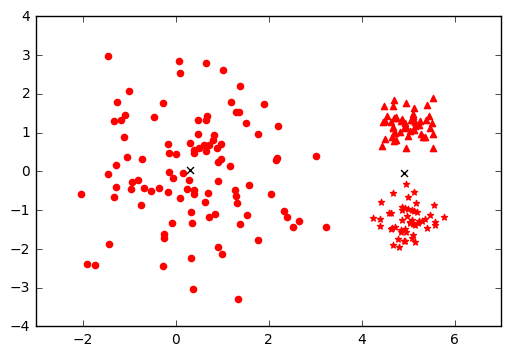

the clustering results of data 2 with K = 3


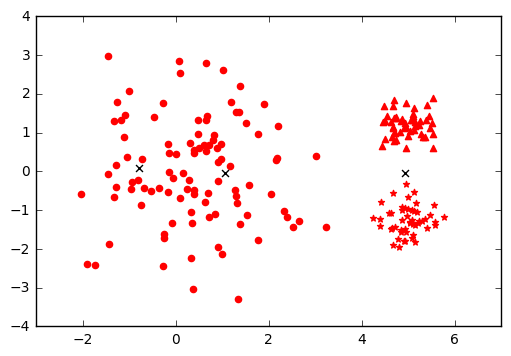

the clustering results of data 2 with K = 4


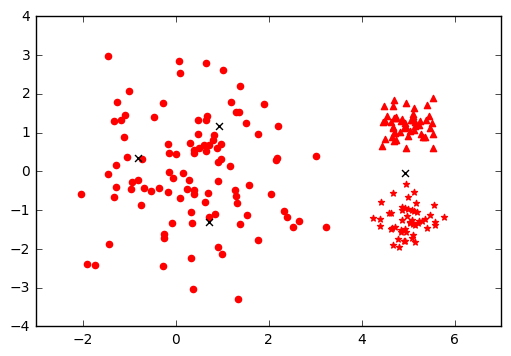

the clustering results of data 2 with K = 5


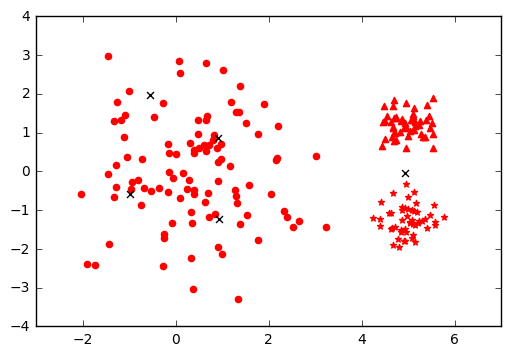

the clustering results of data 3 with K = 1


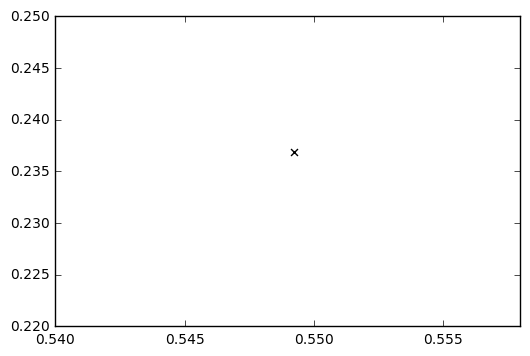

the clustering results of data 3 with K = 2


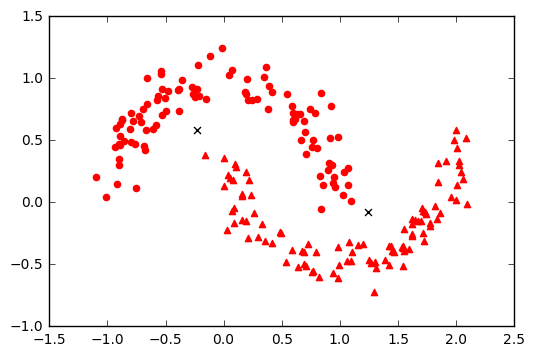

the clustering results of data 3 with K = 3


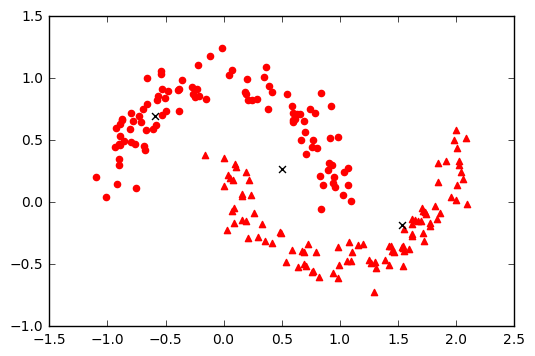

the clustering results of data 3 with K = 4


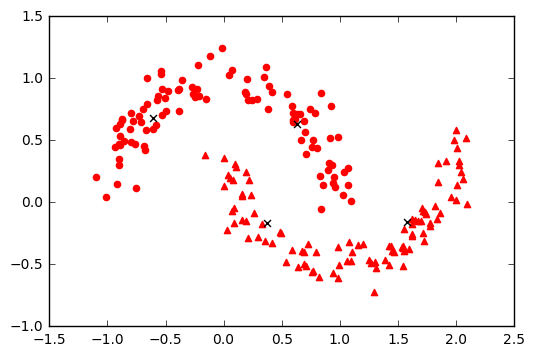

the clustering results of data 3 with K = 5


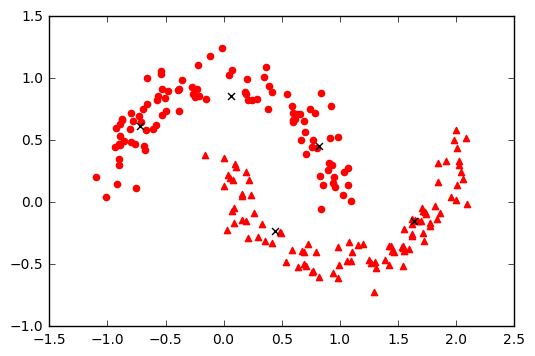

In [39]:

clustering_text = "the clustering results of data {} with K = {}"

data1_cluster_assignments = [plot_k_means(data1_matrix, K, data1_labels, clustering_text.format(1, K)) for K in range(1, 6)]

data2_cluster_assignments = [plot_k_means(data2_matrix, K, data2_labels, clustering_text.format(2, K)) for K in range(1, 6)]

data3_cluster_assignments = [plot_k_means(data3_matrix, K, data3_labels, clustering_text.format(3, K)) for K in range(1, 6)]




### Evaluation of k-means with different Ks

In [ ]:
def get_clustering_scores_k_means(data_matrix, true_labels, clusterings_sse): 
    """
    """
    cluster_assignments, cluster_means, sse = clusterings_sse
    predicted_labels = get_predicted_labels(cluster_assignments)
    
    NMI = normalized_mutual_info_score(true_labels, predicted_labels)
    SC = 0 
    CH = 0
    try: 
        SC = silhouette_score(data_matrix, predicted_labels)
        CH = calinski_harabaz_score(data_matrix, predicted_labels)
    except ValueError: 
        print("number of clusters = 1")
        
    print("\t NMI: ", NMI)
    print("\t SC: ", SC) 
    print("\t CH: ", CH)
    print("\t SSE: ", sse)
    print("------------------------------------------")
    
    return (NMI, SC, CH, sse)

In [ ]:
scores_clustering_data1 = [get_clustering_scores_k_means(data1_matrix, data1_labels, data1_cluster_assignments[i]) 
                           for i in range(5)]

print("========================= scores for data 2 =========================")

scores_clustering_data2 = [get_clustering_scores_k_means(data2_matrix, data2_labels, data2_cluster_assignments[i]) 
                           for i in range(5)]

print("========================= scores for data 3 =========================")

scores_clustering_data3 = [get_clustering_scores_k_means(data3_matrix, data3_labels, data3_cluster_assignments[i]) 
                           for i in range(5)]

In [ ]:
NMI_data1 = []
SC_data1 = []
CH_data1 = []
sse_data1 = []

for NMI, SC, CH, sse in scores_clustering_data1: 
    NMI_data1.append(NMI)
    SC_data1.append(SC)
    CH_data1.append(CH)
    sse_data1.append(sse)
###################################################    
NMI_data2 = []
SC_data2 = []
CH_data2 = []
sse_data2 = []

for NMI, SC, CH, sse in scores_clustering_data2: 
    NMI_data2.append(NMI)
    SC_data2.append(SC)
    CH_data2.append(CH)
    sse_data2.append(sse)

########################################################

NMI_data3 = []
SC_data3 = []
CH_data3 = []
sse_data3 = []

for NMI, SC, CH, sse in scores_clustering_data3: 
    NMI_data3.append(NMI)
    SC_data3.append(SC)
    CH_data3.append(CH)
    sse_data3.append(sse)

#######################################
print("data 1 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data1)
plt.show()
    
print("data 1 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data1[1:])
plt.show()

print("data 1 SC scores for clusters with k in the x axis and the score in the y")  
plt.plot([2, 3, 4, 5], SC_data1[1:])
plt.show()

print("data 1 sse scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], sse_data1)
plt.show()


#######################################

print("data 2 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data2)
plt.show()
    
print("data 2 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data2[1:])
plt.show()


print("data 2 SC scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], SC_data2[1:])
plt.show()


print("data 2 sse scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], sse_data2)    
plt.show()


#######################################
print("data 3 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data3) 
plt.show()
    
print("data 3 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data3[1:])
plt.show()

print("data 3 SC scores for clusters with k in the x axis and the score in the y")  
plt.plot([2, 3, 4, 5], SC_data3[1:])
plt.show()

print("data 3 sse scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], sse_data3)
plt.show()

    

### GMM (Gaussian Mixure Model) 

In [ ]:
#### Expectation Maximization for gaussian mixture models 
## * should perform multiple restarts and accept initial values for the mean and covariance as input 

## initialize the the mean by sampling from a gaussian distribution centered on a random point in the data

## initialize the variance along each dimension to a random fraction of the total variance in the data

### calculating the log probabilities rather than the probabilies themselves helps prevent
## underflow since the log of a very small number  < 1 is a negative number which is > 1

def GMM(data_matrix, K, num_restarts = 100, means = None, variances = None): 
    """
    """
    
    assignments = []
    log_likes = []
    
    for i in range(num_restarts): 
        try: 
            if i == 0: 
                means, variances, soft_assignments, log_likelihood = GMM_helper(data_matrix,
                                                                                K, 
                                                                                means = means,
                                                                                variances = variances)
                if math.isnan(log_likelihood):
                    continue
                    
                assignments.append((means, variances, soft_assignments))
                log_likes.append(log_likelihood)

            else:
                means, variances, soft_assignments, log_likelihood = GMM_helper(data_matrix,
                                                                                K, 
                                                                                means = None,
                                                                                variances = None)
                if math.isnan(log_likelihood):
                    continue
                assignments.append((means, variances, soft_assignments))
                log_likes.append(log_likelihood)
                
        except: 
            continue
        
    return assignments[log_likes.index(max(log_likes))][0], assignments[log_likes.index(max(log_likes))][1] , assignments[log_likes.index(max(log_likes))][2], max(log_likes)


def GMM_helper(data_matrix, K, means = None, variances = None): 
    """
    1) assuming the covariance matrix for each cluster is diagonal 
    A) initialize the the mean by sampling from a gaussian distribution centered on a random point in the data
    B) Initialize the variance along each dimension to a random fraction of the total variance in the data

    """
    
    N, d = np.shape(data_matrix)
    means, variances, soft_assignments, cluster_counts, cluster_label_prob, log_likelihood =  get_initial_values(data_matrix,
                                                                                                                 K, 
                                                                                                                 means = means, 
                                                                                                                variances = variances)
    converged = False
    
    i = 0 
    while not converged:
        prev_soft_assignments = soft_assignments
        prev_means, prev_covars = means, variances
        log_likelihood_prev = log_likelihood
  
        means = get_means(data_matrix, soft_assignments, cluster_counts, K)
        variances = get_vars(data_matrix, soft_assignments, means, cluster_counts, K)
     
        ## 1 × K counts 
        cluster_counts = get_cluster_counts(soft_assignments, N, K)
        
        ## 1 × K probabilities 
        cluster_label_prob = cluster_counts / N
        
        log_joint = get_log_joint(data_matrix, means, variances, cluster_label_prob)

        soft_assignments = get_soft_assignments(log_joint)

        log_likelihood = compute_log_likelihood(log_joint)

        converged = converged_check(log_likelihood_prev, log_likelihood, i)
        i = i + 1
        
    return means, variances, soft_assignments, log_likelihood
    
    
def get_initial_values(data_matrix, K, means = None, variances = None): 
    """
    """
    N, d = np.shape(data_matrix)
    
#     if (means is None) and (variances is None): 
    total_variance = np.var(data_matrix)

    ## choose any number between 0 and 1 
    fraction_var_factor = random.uniform(0, 1) 
    # print("factor = ", fraction_var_factor)
    init_variance_dim = [total_variance * fraction_var_factor for i in range(d)]

    fraction_factor = random.randint(2, 5) 
    std_fraction = (total_variance / (fraction_factor * K)) ** 0.5

    randomInts = [random.randint(0, N-1) for i in range(K)]

    means = np.asarray([np.random.normal(loc=data_matrix[i], scale=std_fraction, size=(1, d)) for i in randomInts]).sum(1)
    variances = np.asarray([init_variance_dim] * K)        
    
    ## 1 × K counts 
    cluster_counts = get_cluster_counts([], N, K, init=True)
    
    [N/K] * K

    ## 1 × K probabilities 
    cluster_label_prob = [N_k/N for N_k in cluster_counts]
    
    log_joint = get_log_joint(data_matrix, means, variances, cluster_label_prob)
    
    soft_assignments = get_soft_assignments(log_joint)
    
    log_likelihood = compute_log_likelihood(log_joint)
    
    
    return means, variances, soft_assignments, cluster_counts, cluster_label_prob, log_likelihood
    

def get_means(data_matrix, soft_assignments, cluster_counts, K): 
    """
    gets the means of the clusters 
    """
    
    N, d = np.shape(data_matrix)
    
    ## K × 1
    cc = np.asarray(cluster_counts)
        
    X = np.asarray(data_matrix)
    g = np.asarray(soft_assignments)
    
    ## N × d --> N × 1 × d
    ## N × K --> N × K × 1
    ### N × K × d
    
    mult_data_prob = X[:, None, :] * g[:, :, None]
    means = np.sum(mult_data_prob, axis = 0)
        
    return means / cc[:, None]
    

def get_vars(data_matrix, soft_assignments, means, cluster_counts, K): 
    """
    """
    X = np.asarray(data_matrix)
    mu = np.asarray(means)
    g = np.asarray(soft_assignments)
    
    # N × d --> N × 1 × d
    ## K × d --> 1 × K × d
    ### N × K × d
    
    ## K × 1
    cc = np.asarray(cluster_counts)
    
    x_m = X[:, None, :] - mu[None, :, :]
    
    sigmas = (g[:, :, None] * x_m ** 2).sum(0)
        
    return sigmas / cc[:, None]
    

def get_cluster_counts(soft_assignments, N, K, init=False): 
    """
    soft_assignments: N × K
    """
    if init: 
        return [N/K] * K
    else: 
        cluster_counts = soft_assignments.sum(axis = 0)
        return np.array(cluster_counts)


def get_log_joint(data_matrix, means, covars, cluster_label_prob): 
    """
    fix the log likelihood based on gaussian formula
    
    N × K 
    """
    
    X = np.asarray(data_matrix)
    mu = np.asarray(means)
    sigma = np.asarray(covars)       
    pi = np.asarray(cluster_label_prob)
    
    X0 = (X[:,None,:] - mu[None,:,:]) ** 2 / sigma[None,:,:]
    log_like = (- np.log(2 * np.pi) - 0.5 * np.log(sigma[None,:,:]) - 0.5 * X0).sum(axis=2)
    log_prior = np.log(pi[None,:])
    
    return log_like + log_prior
    
def get_soft_assignments(log_joint): 
    """
    the cluster assignments is a N × K 
    matrix that specifies probability that each point belongs to cluster k
    """
    w = np.asarray(log_joint)
    w_max = np.max(w, axis = 1)
    w_0 = w - w_max[:, None]
    p = np.exp(w_0)
    return p / p.sum(axis=1)[:, None]

def compute_log_likelihood(log_joint, soft_assignments=None): 
    """
    """
    if soft_assignments is None:
        soft_assignments = get_soft_assignments(log_joint)
    
    return (soft_assignments * (log_joint - np.log(soft_assignments))).sum()

def converged_check(log_likelihood_prev, log_likelihood, i): 
    """
    """
    if log_likelihood_prev > log_likelihood: 
        raise ValueError("log likelihood became smaller !!!")
    
    if i == 99: 
        print("i = 99")
        
    return (i == 100) or (abs(log_likelihood_prev - log_likelihood) <= 0.01)



In [ ]:
def get_predicted_labels_GMM(soft_assignments): 
    """
    """
    g = np.asarray(soft_assignments)
    return np.argmax(g, axis = 1) + 1
    

In [ ]:
##### plot the clusters and do the plots for evals 

In [ ]:
def get_points_in_cluster(data_matrix, predicted_labels): 
    """
    """
    X = np.asarray(data_matrix)
    c_a = np.asarray(predicted_labels)
    K = np.max(predicted_labels)
    N, d = np.shape(X)
    
    clustered_points = [[X[i] for i in range(N) if (c_a[i] == k)] for k in range(1, K+1)]
    
    return clustered_points
        

In [ ]:
#  all_points = [list(p) for p in input_matrix]
#     number_of_original_label = len(list(set(original_labels)))
#     for k in range(K):
#         clustered_k = getClusteredData(input_matrix, cluster_assignments, k)
#         print("k: ", k, "c_k: ", len(clustered_k))
#         for p in list(clustered_k): 
#             i = all_points.index(list(p))
#             plt.scatter(p[0], p[1], color=colors[k-1], marker=shapes[original_labels[i] - 1])
            
#     for c_m in centroids: 
#         print(c_m)
#         plt.scatter(c_m[0], c_m[1], color='black', s = 25, marker = 'x')

def plot_GMM_labels(input_matrix, predicted_labels, means, original_labels, K, colors,  shapes):    
    """
    """
    all_points = [list(p) for p in input_matrix]
    points_Ks = get_points_in_cluster(input_matrix, predicted_labels)
    for k in range(K):
        for p in list(points_Ks[k]): 
            i = all_points.index(list(p))
            plt.scatter(p[0], p[1], color=colors[k-1], marker=shapes[original_labels[i] - 1])
            
    for c_m in means: 
        plt.scatter(c_m[0], c_m[1], color='black', s = 25, marker = 'x')
   
    plt.show()

In [ ]:
def plot_GMM(data_matrix, K, original_labels, clustering_text, num_restarts=100, initial_means=None, initial_vars=None): 
    """ 
    """
    print(clustering_text)
    means, variances, soft_assignments, log_likelihood = GMM(data_matrix, K, num_restarts = 100, means = initial_means, variances = initial_vars)
    predicted_labels = get_predicted_labels_GMM(soft_assignments)
    plot_GMM_labels(data_matrix, 
                    predicted_labels,
                    means,
                    original_labels,
                    K, 
                    ["red", "blue", "green", "pink", "yellow"], 
                    ["o", "^", "*", "s", "D"])
    
    return (means, variances, predicted_labels, log_likelihood)


clustering_text = "GMM: the clustering results of data {} with K = {}"

data1_cluster_assignments_GMM = [plot_GMM(data1_matrix, K, data1_labels, clustering_text.format(1, K)) for K in range(1, 6)]

data2_cluster_assignments_GMM = [plot_GMM(data2_matrix, K, data2_labels, clustering_text.format(2, K)) for K in range(1, 6)]

data3_cluster_assignments_GMM = [plot_GMM(data3_matrix, K, data3_labels, clustering_text.format(3, K)) for K in range(1, 6)]

## Evaluation of GMM

In [ ]:
def get_clustering_scores_GMM(data_matrix, true_labels, GMM_results): 
    """
    """
    means, variances, predicted_labels, log_likelihood = GMM_results
    NMI = normalized_mutual_info_score(true_labels, predicted_labels)
    SC = 0 
    CH = 0
    try: 
        SC = silhouette_score(data_matrix, predicted_labels)
        CH = calinski_harabaz_score(data_matrix, predicted_labels)
    except ValueError: 
        print("number of clusters = 1")
        
    print("\t NMI: ", NMI)
    print("\t SC: ", SC) 
    print("\t CH: ", CH)
    print("\t Log Likelihood: ", log_likelihood)
    print("------------------------------------------")
    
    return (NMI, SC, CH, log_likelihood)

In [ ]:
scores_clustering_data1_GMM = [get_clustering_scores_GMM(data1_matrix, data1_labels, data1_cluster_assignments_GMM[i]) 
                           for i in range(5)]

print("========================= scores for data 2 =========================")

scores_clustering_data2_GMM = [get_clustering_scores_GMM(data2_matrix, data2_labels, data2_cluster_assignments_GMM[i]) 
                           for i in range(5)]

print("========================= scores for data 3 =========================")

scores_clustering_data3_GMM = [get_clustering_scores_GMM(data3_matrix, data3_labels, data3_cluster_assignments_GMM[i]) 
                           for i in range(5)]

In [ ]:
NMI_data1_GMM = []
SC_data1_GMM = []
CH_data1_GMM = []
ll_data1_GMM = []

for NMI, SC, CH, ll in scores_clustering_data1_GMM: 
    NMI_data1_GMM.append(NMI)
    SC_data1_GMM.append(SC)
    CH_data1_GMM.append(CH)
    ll_data1_GMM.append(ll)
###################################################    
NMI_data2_GMM = []
SC_data2_GMM = []
CH_data2_GMM = []
ll_data2_GMM = []

for NMI, SC, CH, sse in scores_clustering_data2_GMM: 
    NMI_data2_GMM.append(NMI)
    SC_data2_GMM.append(SC)
    CH_data2_GMM.append(CH)
    ll_data2_GMM.append(ll)

########################################################

NMI_data3_GMM = []
SC_data3_GMM = []
CH_data3_GMM = []
ll_data3_GMM = []

for NMI, SC, CH, ll in scores_clustering_data3_GMM: 
    NMI_data3_GMM.append(NMI)
    SC_data3_GMM.append(SC)
    CH_data3_GMM.append(CH)
    ll_data3_GMM.append(ll)

####################################################
print("GMM: data 1 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data1_GMM)
plt.show()
    
print("GMM: data 1 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data1_GMM[1:])
plt.show()

print("GMM: data 1 SC scores for clusters with k in the x axis and the score in the y")  
plt.plot([2, 3, 4, 5], SC_data1_GMM[1:])
plt.show()

print("GMM: data 1 log likelihood scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], ll_data1_GMM)
plt.show()


#######################################

print("data 2 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data2_GMM)
plt.show()
    
print("data 2 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data2_GMM[1:])
plt.show()


print("data 2 SC scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], SC_data2_GMM[1:])
plt.show()


print("data 2 log likelihood scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], ll_data2_GMM)    
plt.show()


#######################################
print("data 3 NMI scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], NMI_data3_GMM) 
plt.show()
    
print("data 3 CH scores for clusters with k in the x axis and the score in the y")
plt.plot([2, 3, 4, 5], CH_data3_GMM[1:])
plt.show()

print("data 3 SC scores for clusters with k in the x axis and the score in the y")  
plt.plot([2, 3, 4, 5], SC_data3_GMM[1:])
plt.show()

print("data 3 log likelihood scores for clusters with k in the x axis and the score in the y")
plt.plot([1, 2, 3, 4, 5], ll_data3_GMM)
plt.show()

    

## Question 7: 
#### K_means clustering works best for the first data because the variance of all three clusters are the same and the mean of the data points in in the center of the clusters 

#### Based on the plots in K = 3, GMM performs better on data 2 since the variance of the three clusters is different so the spread of the data is different and K-means does not take the variance of the clusters into consideration

#### Based on the NMI of K = 2 for the clustering of the data 3 using GMM or K-means, GMM performs better than K-means because the clusters in data 3 take on  Non-globular Shapes. The best clustering to use on the third data is DB_scan since the density of the clusters is what defines the shape and GMM depends on the data being from a normal distribution. 


# The End of the last HW in DM :) 